#  <font color='orange'>**MACHINE LEARNING MIS**  </font> 
***
##  Classification <br>

 **USE STOCHASTIC GRADIENT DESCENT IF THAT DOESNT WORK USE KERNEL APPROXIMATION**<br> 

  
##  Regression <br>

 **USE STOCHASTIC GRADIENT REGRESSOR** <br> 
  **Business Use Cases** : 
  1- (Revenue - Spending) Prediction with high accuracy can optimize Media Buying Profit. 
  
  Label = Revenue; Features: CTR, Impression Count, Load Count, Play Count 
  
  
  
 <br> 

  

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://scikit-learn.org/stable/_static/ml_map.png")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
import numpy as np
import psycopg2 

connection_ml = psycopg2.connect(user = "postgres",
                                  password = "",
                                  host = "34.77.230.6",
                                  port = "5432",
                                  database = "")
cursor_1 = connection_ml.cursor()

ad_report = pd.read_sql_query( ' SELECT  "RptDate", "RptImpression", "RptTotalRequest", "RptCtr", "RptRevenue", "RptLoadCount", "RptPlayCount" FROM dbo."AdReport"where "RptAssId" = 70376 ', connection_ml)



In [43]:
ad_report.describe()

,RptImpression,RptTotalRequest,RptCtr,RptRevenue,RptLoadCount,RptPlayCount
count,58895.000000,58895.000000,58895.000000,58895.000000,58895.000000,58895.000000
mean,3.553154,5.329264,0.098346,0.007485,0.660939,5.274539
std,12.709993,44.028363,0.333720,0.028466,55.110833,20.615225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,2.000000,0.000000,0.001018,0.000000,1.000000
75%,2.000000,4.000000,0.000000,0.005373,0.000000,3.000000
max,516.000000,7546.000000,9.000000,1.440468,11172.000000,1327.000000


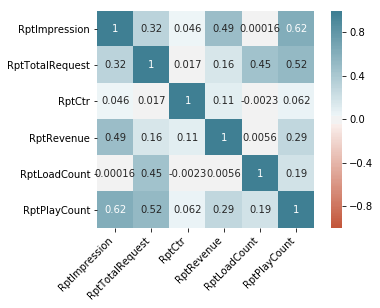

In [3]:
import seaborn as sns 

corr = ad_report.corr()

ax = sns.heatmap( 
corr, 
vmin = -1, 
vmax = 1, center =0, cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [2]:
print(ad_report.shape)

(58967, 7)


In [44]:
ad_report.head(10)

,RptDate,RptImpression,RptTotalRequest,RptCtr,RptRevenue,RptLoadCount,RptPlayCount
0,2017-11-10,1,1,0.0,0.000035,0,1
1,2017-11-10,3,8,0.0,0.000246,0,2
2,2017-11-10,1,2,0.0,0.002153,0,1
3,2017-11-10,1,2,1.0,0.000841,0,1
4,2017-11-10,1,2,0.0,0.000000,0,1
5,2017-11-10,1,1,0.0,0.001647,0,1
6,2017-11-10,2,2,0.0,0.009029,0,4
7,2017-11-10,2,2,0.0,0.001238,0,2
8,2017-11-10,1,3,0.0,0.000704,0,1
9,2017-11-10,1,1,0.0,0.000682,0,1


In [10]:
target = ad_report["RptRevenue"]
predictors = ad_report[["RptImpression","RptTotalRequest","RptLoadCount","RptPlayCount"]]
print(target.shape)

target.to_numpy()
predictors.to_numpy()

(60421,)


array([[1, 1, 0, 1],
       [3, 8, 0, 2],
       [1, 2, 0, 1],
       ...,
       [2, 2, 0, 1],
       [1, 3, 0, 2],
       [1, 1, 0, 1]], dtype=int64)

In [11]:
# Test Train Split ilk olarak ve sonrasında Min Max Scaling buraya gelecek. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors.to_numpy(), target.to_numpy(), test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(48336, 4) (48336,)
(12085, 4) (12085,)


In [12]:
# min max scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(predictors.to_numpy()))
print(scaler.transform(predictors.to_numpy()))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.00193798 0.00013252 0.         0.00075358]
 [0.00581395 0.00106016 0.         0.00150716]
 [0.00193798 0.00026504 0.         0.00075358]
 ...
 [0.00387597 0.00026504 0.         0.00075358]
 [0.00193798 0.00039756 0.         0.00150716]
 [0.00193798 0.00013252 0.         0.00075358]]


In [13]:
from keras import optimizers 
from keras.models import Sequential
from keras.layers import Activation, Dense

model = Sequential()
model.add(Dense(4, input_dim= 4, activation = 'relu'))
model.add(Dense(1, activation ='sigmoid'))    # Burası kerasın ilk gereken parçası Sequential Model veya Functional API tercihe göre 

model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy']) # burada optimizer (keras modeli kurmak için gerekli iki argümandan biri)

model.fit(X_train, y_train, epochs=10, batch_size=32) # burada tranining başlıyor 

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32) # burada kayıp ile performans ölçülüyor 

classes = model.predict(X_test, batch_size=128) # burada sonuş olarak prediction eğrisi çiziliyor. 

Epoch 1/10
48336/48336 [==============================] - 1s 30us/step - loss: 0.0940 - accuracy: 0.2763
Epoch 2/10
48336/48336 [==============================] - 1s 29us/step - loss: 0.0022 - accuracy: 0.3139
Epoch 3/10
48336/48336 [==============================] - 1s 30us/step - loss: 0.0012 - accuracy: 0.3140
Epoch 4/10
48336/48336 [==============================] - 2s 32us/step - loss: 8.8293e-04 - accuracy: 0.3141
Epoch 5/10
48336/48336 [==============================] - 1s 28us/step - loss: 8.4679e-04 - accuracy: 0.3141
Epoch 6/10
48336/48336 [==============================] - 1s 28us/step - loss: 8.2980e-04 - accuracy: 0.3141
Epoch 7/10
48336/48336 [==============================] - 1s 28us/step - loss: 8.2234e-04 - accuracy: 0.3141
Epoch 8/10
48336/48336 [==============================] - 1s 27us/step - loss: 8.1920e-04 - accuracy: 0.3141
Epoch 9/10
48336/48336 [==============================] - 1s 27us/step - loss: 8.1790e-04 - accuracy: 0.3141
Epoch 10/10
12085/12085 [======

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


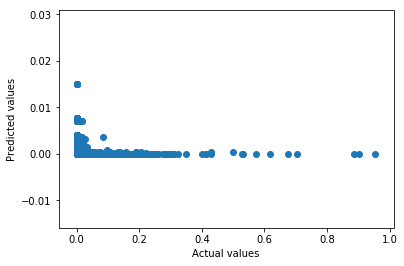

In [15]:
# Visualize the data versus R-squared line 

plt.scatter(y_test,classes)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [1]:
# The Accuracy is not high enough
# Change the Optimizer
# Change the Epochs of Training 
# Change the Layers Density 
# Change the Regression Model entirely
# Check for R2 regression relevance in the data, aka are columns meaningful 
# Search for all the accuracy improvement methods in Machine Learning 